In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
data = pd.read_csv("heart-disease-dataset.csv")
data.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,1.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0,0.0


In [3]:
X = data.drop("target", axis=1)
y = data["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [7]:
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [9]:
def evaluate_model(name, y_true, y_pred, model, X_test):
    print(name)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, model.predict_proba(X_test)[:, 1]))
    print("-" * 40)

In [10]:
evaluate_model("Logistic Regression", y_test, lr_pred, lr_model, X_test)
evaluate_model("Support Vector Machine", y_test, svm_pred, svm_model, X_test)
evaluate_model("Random Forest", y_test, rf_pred, rf_model, X_test)

Logistic Regression
Accuracy: 0.8613445378151261
Precision: 0.8712121212121212
Recall: 0.8778625954198473
F1 Score: 0.8745247148288974
ROC-AUC: 0.9088249982164515
----------------------------------------
Support Vector Machine
Accuracy: 0.8907563025210085
Precision: 0.8671328671328671
Recall: 0.9465648854961832
F1 Score: 0.9051094890510949
ROC-AUC: 0.9475636726831704
----------------------------------------
Random Forest
Accuracy: 0.9453781512605042
Precision: 0.9338235294117647
Recall: 0.9694656488549618
F1 Score: 0.951310861423221
ROC-AUC: 0.9720696297353214
----------------------------------------


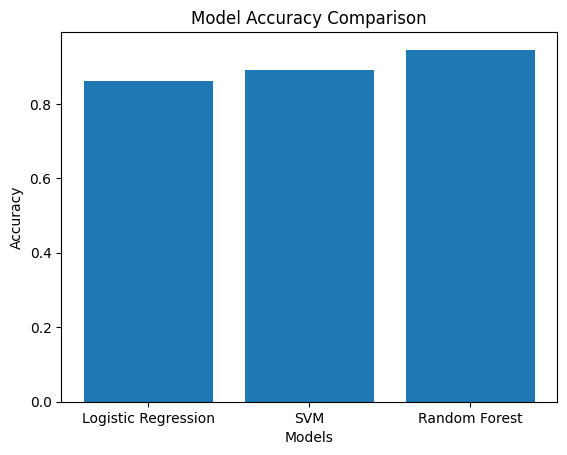

In [11]:
models = ["Logistic Regression", "SVM", "Random Forest"]
accuracy = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, rf_pred)
]

plt.figure()
plt.bar(models, accuracy)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()

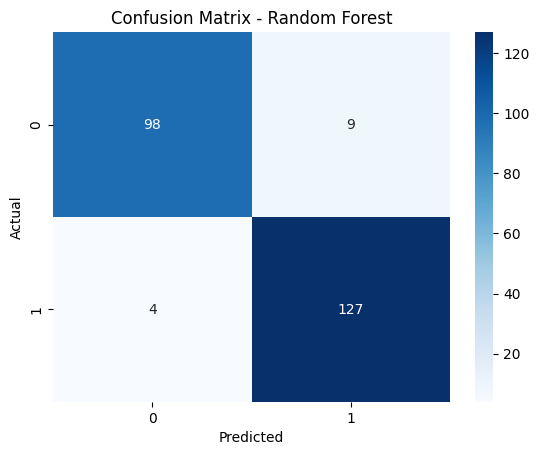

In [12]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

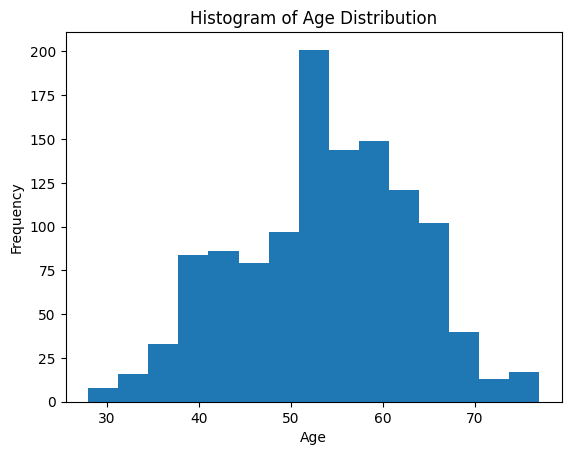

In [13]:
plt.figure()
plt.hist(data["age"], bins=15)
plt.title("Histogram of Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

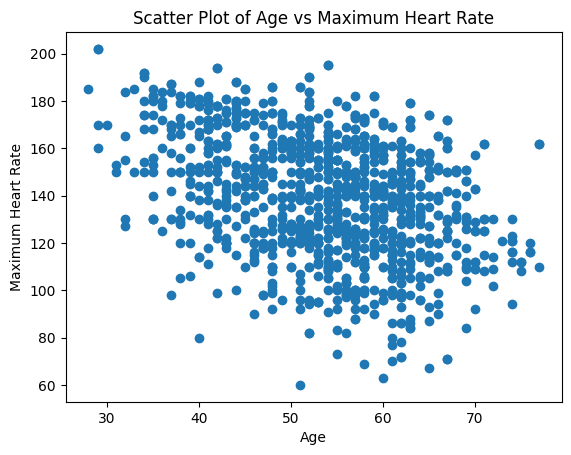

In [17]:
plt.figure()
plt.scatter(data["age"], data["max_heart_rate"])
plt.title("Scatter Plot of Age vs Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

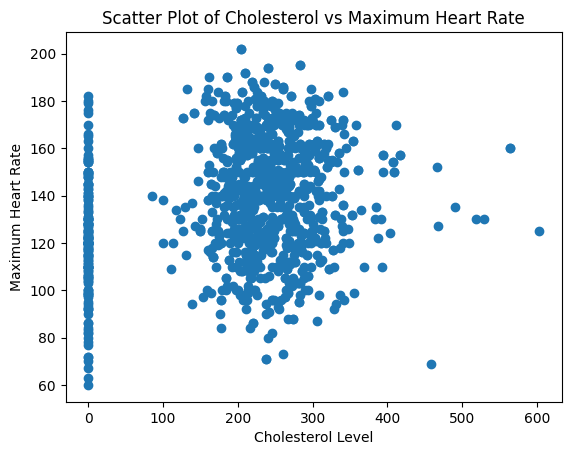

In [18]:
plt.figure()
plt.scatter(data["cholesterol"], data["max_heart_rate"])
plt.title("Scatter Plot of Cholesterol vs Maximum Heart Rate")
plt.xlabel("Cholesterol Level")
plt.ylabel("Maximum Heart Rate")
plt.show()

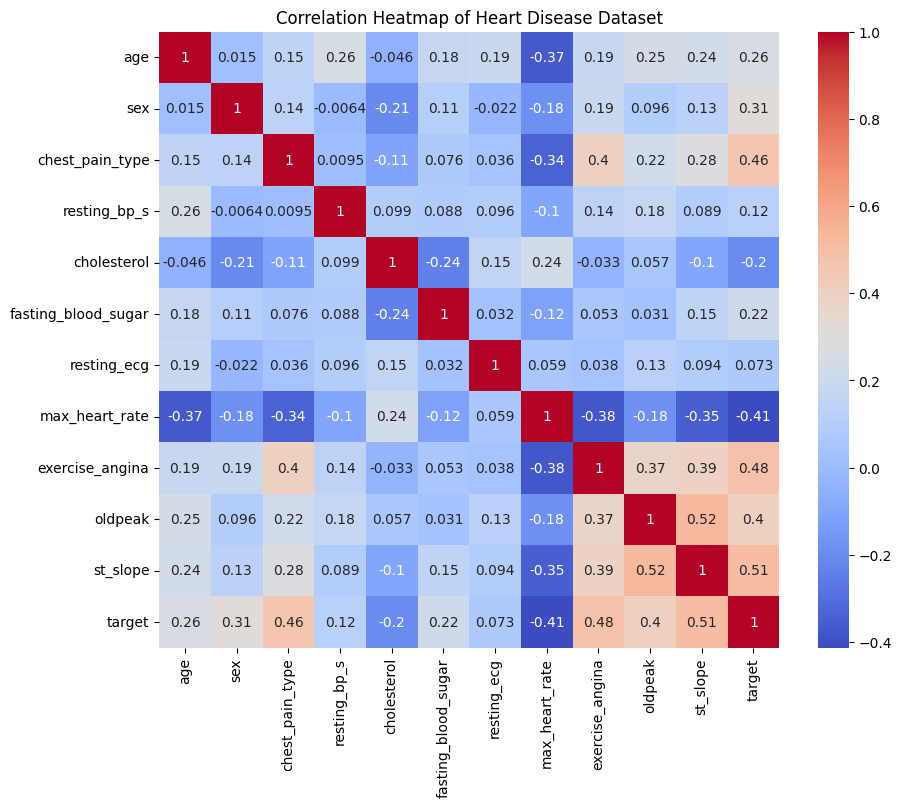

In [19]:
plt.figure(figsize=(10,8))
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()

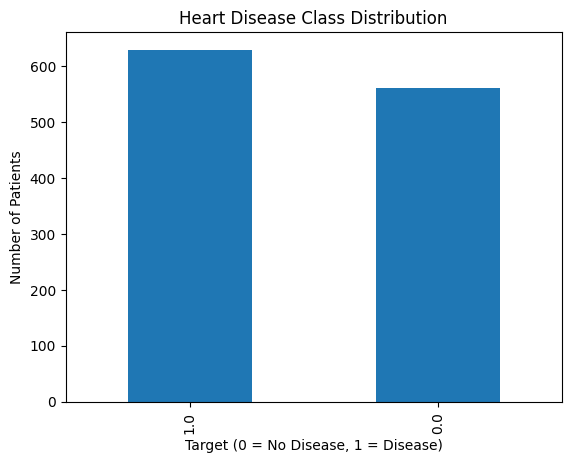

In [20]:
plt.figure()
data["target"].value_counts().plot(kind="bar")
plt.title("Heart Disease Class Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Number of Patients")
plt.show()

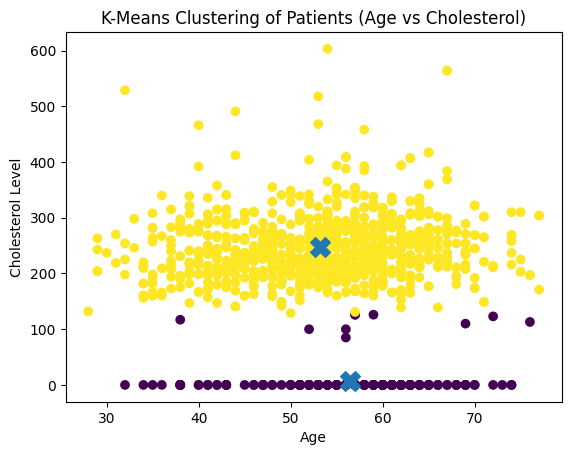

In [21]:
from sklearn.cluster import KMeans

X_cluster = data[["age", "cholesterol"]]

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

plt.figure()
plt.scatter(X_cluster["age"], X_cluster["cholesterol"], c=clusters)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker="X",
    s=200
)
plt.title("K-Means Clustering of Patients (Age vs Cholesterol)")
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")
plt.show()